In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from operator import itemgetter
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.spatial import distance


In [2]:
# Function to load files from csv file
def loadCVS(fileName):
    data = pd.read_csv(fileName, header = None)

    # Separate features and labels
    X = data.iloc[:, 1:].values
    y = data.iloc[:, 0].values

    return X, y

X, y = loadCVS('mnist-1.csv')

## Perform PCA on the dataset to reduce each sample into a 10-dimensional feature vector. Show the covariance matrix of the transformed data. Please also copy your code snippet here. (25)

In [3]:
# Initialize PCA with 10 components
PCA = PCA(n_components=10)

# Fit and transform the data
X_transform = PCA.fit_transform(X)

# The covariance matrix of the transformed data
covariance_matrix = np.cov(X_transform, rowvar=False)

print(f"Covariance matrix of the transformed data with shape = {covariance_matrix.shape} is:\n{covariance_matrix}\n")


Covariance matrix of the transformed data with shape = (10, 10) is:
[[ 5.30558677e+00  1.59898765e-17  0.00000000e+00 -1.27826478e-16
  -5.68528943e-17 -4.14552355e-17  1.18443530e-17 -6.39595061e-17
   6.04062002e-17 -5.92217649e-18]
 [ 1.59898765e-17  3.87701635e+00  8.97801957e-16  3.00846566e-15
   9.92556780e-16  5.61126223e-16  2.19120530e-17  3.19797531e-17
   5.80373296e-17 -4.32318884e-17]
 [ 0.00000000e+00  8.97801957e-16  3.28704664e+00  1.78494400e-15
   1.31946092e-15  4.28765578e-16 -8.61084462e-16 -2.96108825e-17
  -4.73774120e-17  9.23859533e-17]
 [-1.27826478e-16  3.00846566e-15  1.78494400e-15  2.91254096e+00
  -1.29340335e-15  3.34602972e-17  7.79654535e-16  6.33672885e-17
   1.11336918e-16 -8.29104709e-18]
 [-5.68528943e-17  9.92556780e-16  1.31946092e-15 -1.29340335e-15
   2.48633206e+00 -2.77276303e-15 -1.26734577e-15 -1.87288832e-16
  -2.51692501e-16  4.36168299e-16]
 [-4.14552355e-17  5.61126223e-16  4.28765578e-16  3.34602972e-17
  -2.77276303e-15  2.35358942e+

## Perform k-means clustering to cluster the dataset (without applying PCA) into 10 groups. Please copy your code snippet here. (25)

In [4]:
# K-means object with 10 clusters
k_means = KMeans(n_clusters=10, random_state=0)
k_means.fit(X)

clusters = k_means.labels_

# Coordinates of the cluster centers
centroids = k_means.cluster_centers_

print(f"Clusters for data points are:\n{clusters}\n with centroids:\n{centroids}")


C:\Users\Seth\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Clusters for data points are:
[0 4 7 ... 0 9 5]
 with centroids:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Please plot the loss curve, that is, the change of loss value of the k-means algorithm with respect to the number of iterations (10)

In [5]:
# Loss function of k-means
def kmeans_loss(sample_points, clusters, centroids):
    diff = sample_points - centroids[clusters]
    sq_norm = np.linalg.norm(diff, axis=1) ** 2
    return np.sum(sq_norm)

# Calculate the euclidean distance from each sample point 
def e_step(centroids, sample_points):
    diff = sample_points[:, np.newaxis, :] - centroids[np.newaxis, :, :]
    dist_sq = np.sum(diff ** 2, axis=-1)
    clusters = np.argmin(dist_sq, axis=1)
    return clusters

# Update the centroids  
def m_step(clusters, sample_points, k_clusters):
    centroids = np.empty((k_clusters, sample_points.shape[1]))
    for k in range(k_clusters):
        points_in_cluster = sample_points[clusters == k]
        centroids[k] = np.mean(points_in_cluster, axis=0)
    return centroids

def plot_kmeans(sample_points, k_clusters):
    rng = np.random.default_rng()
    centroids_idx = rng.choice(range(sample_points.shape[0]), k_clusters, replace=False)
    centroids = sample_points[centroids_idx, :]
    clusters = np.zeros(sample_points.shape[0], dtype=int)
    data = []

    for i in range(10000):
        temp_clusters = e_step(centroids, sample_points)
        # Calculate and store loss
        mid_loss = kmeans_loss(sample_points, temp_clusters, centroids)
        data.append((i + 0.5, mid_loss))
        
        centroids = m_step(temp_clusters, sample_points, k_clusters)
        # Calculate and store loss after updating  centroids
        final_loss = kmeans_loss(sample_points, temp_clusters, centroids)
        data.append((i + 1, final_loss))

        if np.array_equal(clusters, temp_clusters):
            break

        clusters = temp_clusters

    return clusters, centroids, data

In [11]:
data = plot_kmeans(X, 10)
data = np.array(data[2])

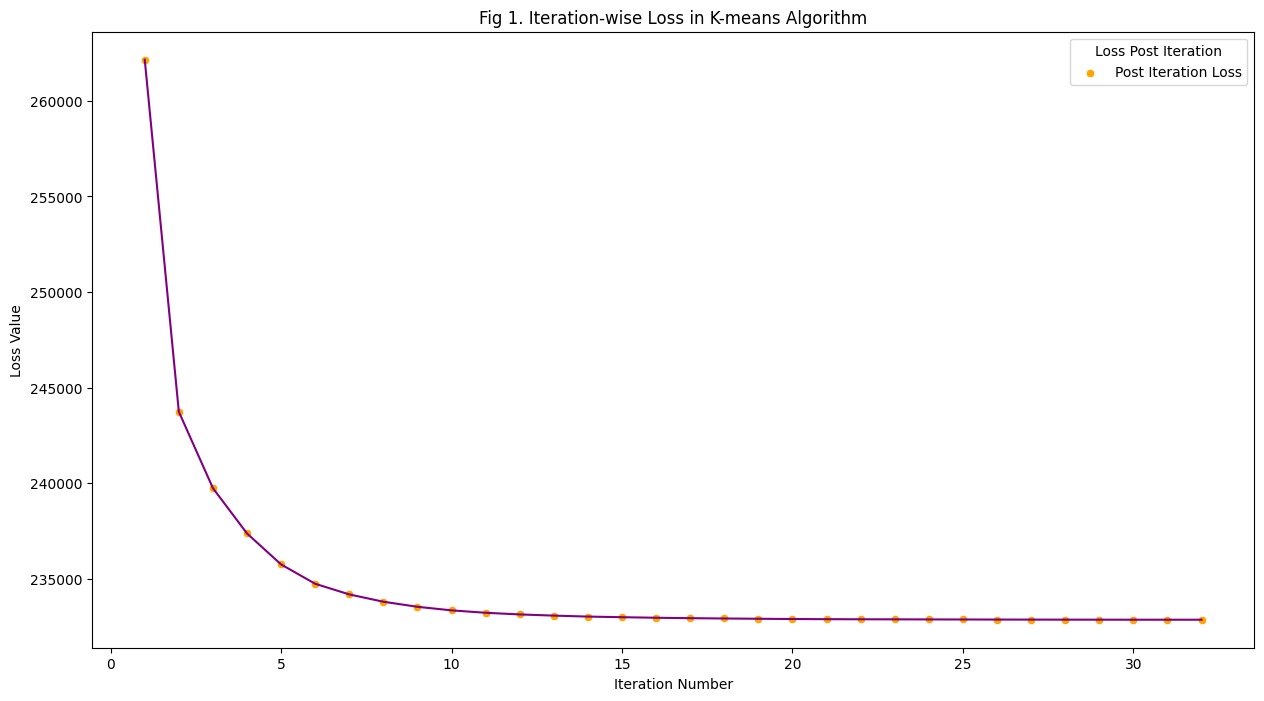

In [12]:
plt.figure(figsize=(15, 8))
ax = sns.lineplot(x=data[1::2][:, 0], y=data[1::2][:, 1], color='purple')
sns.scatterplot(x=data[1::2][:, 0], y=data[1::2][:, 1], ax=ax, color='orange', label='Post Iteration Loss')
ax.set_title('Fig 1. Iteration-wise Loss in K-means Algorithm')
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Loss Value')
ax.legend(title='Loss Post Iteration')
plt.show()


## Please use the first 4000 samples as the training set and remaining 2000 samples as the validation set, and design a way to choose the best k in k-means algorithm. Please copy your code snippet here.

In [8]:
def best_k(train_set, cv_set):    
    data = []

    for k in range(5, 20, 2):
        # Run K-means algorithm with the selected k
        clusters, centroids, plot_data = plot_kmeans(train_set, k)
        cv_cluster = e_step(centroids, cv_set)
        
        # Calculate the loss on the cv set
        loss_value = kmeans_loss(cv_set, cv_cluster, centroids)
        data.append((k, loss_value))

    return data

In [9]:
data_k = best_k(X[:4000, :], X[4000:, :])

# best k found
print(f"Best k value : {min(data_k, key=itemgetter(1))[0]}.")

Best k value : 19.


## Question 5

In [10]:
from scipy.spatial import distance
from collections import Counter


np.random.seed(0)  # set seed to 0|
# Computes the RBF kernel matrix for the given sample points.
def calc_k_matrix(sample_points):
    dist_sq = distance.cdist(sample_points, sample_points, 'sqeuclidean')
    scale = np.sum(dist_sq) / (sample_points.shape[0] ** 2)
    return np.exp((-1 / scale) * dist_sq)

def kk_means(sample_points, k_clusters):
    # kernel trick
    centroid_indices = np.random.choice(range(sample_points.shape[0]), k_clusters, replace=False)
    kernel_matrix = calc_k_matrix(sample_points)
    clusters = np.argmin(-(kernel_matrix[:, centroid_indices]), axis=1)
    cluster_dist = np.zeros((sample_points.shape[0], k_clusters))

    for _ in range(10000):
        count = Counter(clusters)
        for k in range(k_clusters):
            denominator = count[k]

            term1 = (1 / denominator) * kernel_matrix[:, clusters == k]
            term2 = (1 / (denominator ** 2)) * np.sum(kernel_matrix[:, clusters == k], axis=1)
            cluster_dist[:, k] -= 2 * np.sum(term1, axis=1)
            cluster_dist[:, k] += term2

        temp_clusters = np.argmin(cluster_dist, axis=1)
        # Run until converge
        if (clusters == temp_clusters).all():
            break
        clusters = temp_clusters
        cluster_dist.fill(0)

    return clusters
# Using first 500 samples and clustering them into 5 groups
clusters = kk_means(X[:500, :], 5)
print(f"Solution \n {clusters}")


Solution 
 [3 2 4 1 4 4 1 3 1 4 3 1 1 0 1 4 4 3 1 1 4 2 4 1 1 3 4 3 4 1 1 3 0 4 0 1 0
 0 4 0 1 3 1 1 1 4 1 1 1 3 1 2 4 1 4 3 2 4 4 1 4 1 0 2 0 1 0 1 2 0 1 4 1 0
 1 2 1 1 1 4 0 0 0 0 4 3 1 4 2 4 0 4 4 0 3 0 4 3 1 1 1 4 1 4 1 1 0 3 2 1 4
 3 1 1 2 4 4 3 2 2 4 2 1 4 1 3 0 4 1 0 1 4 1 4 1 3 1 1 0 4 1 1 4 1 1 1 3 0
 4 3 1 0 1 4 4 0 2 3 4 3 1 3 4 4 4 0 4 4 1 0 4 3 4 1 1 1 1 1 4 3 1 3 1 4 1
 4 1 0 4 1 1 1 0 4 4 4 4 3 1 4 1 1 3 3 0 1 2 3 1 2 1 1 1 0 4 3 0 4 0 1 3 0
 4 4 4 3 4 4 1 2 4 1 0 3 2 3 1 4 0 1 1 0 3 4 0 3 2 4 1 2 1 1 1 0 1 3 1 4 4
 1 1 0 1 4 4 3 1 4 1 1 1 4 4 1 1 4 1 3 0 3 4 3 4 2 1 4 0 1 4 4 1 3 4 2 4 3
 2 4 1 0 1 4 0 2 1 4 2 4 0 1 1 0 1 4 4 1 1 0 1 4 0 3 4 0 4 0 2 3 0 4 1 0 1
 3 4 1 4 4 4 0 4 3 4 3 4 1 3 0 1 4 4 1 0 4 4 1 1 1 1 2 1 3 4 4 4 3 1 0 1 4
 1 4 4 4 4 0 1 4 1 4 4 3 1 4 4 3 1 4 1 4 1 3 1 3 1 0 1 1 1 2 0 0 4 1 1 3 1
 1 1 4 1 4 1 4 0 3 1 1 1 4 4 0 1 4 1 3 4 2 4 2 0 0 4 3 4 2 4 1 4 3 2 4 4 1
 1 3 4 1 3 0 1 0 1 2 1 1 1 3 2 4 4 4 2 1 2 0 1 4 1 4 1 4 1 2 1 1 4 3 4 3 4
 4 4 4 1 4 1 4